In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [ ]:
dede= train.loc[train['Kelas Pekerja']!='?'].copy()
List_Pendidikan = list(dede['Pendidikan'].unique())
dicts={}
dede.loc[dede['Pendidikan']=='SMA','Kelas Pekerja'].mode()
for i in List_Pendidikan:
    dicts[i]= dede.loc[dede['Pendidikan']==i,'Kelas Pekerja'].mode().values[0]
dicts

{'10th': 'Wiraswasta',
 '11th': 'Wiraswasta',
 '12th': 'Wiraswasta',
 '1st-4th': 'Wiraswasta',
 '5th-6th': 'Wiraswasta',
 '7th-8th': 'Wiraswasta',
 '9th': 'Wiraswasta',
 'D3': 'Wiraswasta',
 'D4': 'Wiraswasta',
 'Doktor': 'Wiraswasta',
 'Master': 'Wiraswasta',
 'Pendidikan Tinggi': 'Wiraswasta',
 'SD': 'Wiraswasta',
 'SMA': 'Wiraswasta',
 'Sarjana': 'Wiraswasta',
 'Sekolah Professional': 'Wiraswasta'}

In [ ]:
train['Kelas Pekerja'] = train['Kelas Pekerja'].replace({'?': 'Wiraswasta'})
test['Kelas Pekerja'] = test['Kelas Pekerja'].replace({'?': 'Wiraswasta'})

In [ ]:
dicts_pekerjaan= {}
for i in List_Pendidikan:
    dicts_pekerjaan[i] = dede.loc[dede['Pendidikan']==i,'Pekerjaan'].mode().values[0]
print(dicts_pekerjaan)

{'SMA': 'Perbaikan Kerajinan', '10th': 'Servis Lainnya', 'D3': 'Pemuka Agama', 'Sarjana': 'Spesialis', 'Master': 'Spesialis', 'Pendidikan Tinggi': 'Pemuka Agama', '1st-4th': 'Servis Lainnya', 'Sekolah Professional': 'Spesialis', '7th-8th': 'Perbaikan Kerajinan', 'Doktor': 'Spesialis', '5th-6th': 'Servis Lainnya', '11th': 'Servis Lainnya', '9th': 'Perbaikan Kerajinan', 'D4': 'Perbaikan Kerajinan', '12th': 'Servis Lainnya', 'SD': 'Servis Lainnya'}


In [ ]:
train.loc[train['Kelas Pekerja']=='?'].index.tolist()

[]

In [ ]:
train['Pekerjaan'].value_counts()

Spesialis                4587
Perbaikan Kerajinan      4507
Ekesekutif Managerial    4481
Pemuka Agama             4158
Sales                    4044
Servis Lainnya           3615
Mesin Inspeksi           2250
?                        2069
Supir                    1741
Pembersih                1540
Petani                   1076
Tech-support             1042
Penjaga                   686
Asisten Rumah Tangga      187
Tentara                    11
Name: Pekerjaan, dtype: int64

In [ ]:
berat_label= [1,2,3,4,5,6,7,8,9,10]
test['Berat Akhir']=pd.qcut(test['Berat Akhir'],10, labels=berat_label)
train['Berat Akhir']=pd.qcut(train['Berat Akhir'],10, labels=berat_label)

In [ ]:
train['Pendidikan']=train['Pendidikan'].replace({'SMA':1,'10th':2,'D3':3,'Sarjana':4,'Master':5,'Pendidikan Tinggi':6,'1st-4th':7,'Sekolah Professional':8,'7th-8th':9,'Doktor':10,'5th-6th':11,'11th':12,'9th':13,'D4':14, '12th':15,'SD':16})
test['Pendidikan']=test['Pendidikan'].replace({'SMA':1,'10th':2,'D3':3,'Sarjana':4,'Master':5,'Pendidikan Tinggi':6,'1st-4th':7,'Sekolah Professional':8,'7th-8th':9,'Doktor':10,'5th-6th':11,'11th':12,'9th':13,'D4':14, '12th':15,'SD':16})
train['Gaji']=train['Gaji'].replace({'<=7jt':0,'>7jt':1})

In [ ]:
for col in train:
    if col=='Gaji':
        break
    else:
        print(train[[col,'Gaji']].groupby([col],as_index=False).mean())

          id  Gaji
0          0     0
1          1     0
2          2     1
3          3     0
4          4     1
...      ...   ...
35989  35989     0
35990  35990     1
35991  35991     1
35992  35992     0
35993  35993     1

[35994 rows x 2 columns]
    Umur      Gaji
0     17  0.000000
1     18  0.000000
2     19  0.002608
3     20  0.001196
4     21  0.005896
..   ...       ...
68    85  0.500000
69    86  0.000000
70    87  0.000000
71    88  0.200000
72    90  0.235294

[73 rows x 2 columns]
                   Kelas Pekerja      Gaji
0  Pekerja Bebas Bukan Perusahan  0.275297
1       Pekerja Bebas Perusahaan  0.556167
2               Pemerintah Lokal  0.296930
3              Pemerintah Negara  0.276913
4            Pemerintah Provinsi  0.402439
5                 Tanpa di Bayar  0.066667
6           Tidak Pernah Bekerja  0.000000
7                     Wiraswasta  0.207952
  Berat Akhir      Gaji
0           1  0.213333
1           2  0.246179
2           3  0.252570
3           

In [ ]:
train['Status Perkawinan'] = train['Status Perkawinan'].replace({'Menikah':5, 'Belum Pernah Menikah':4,'Cerai':3, 'Berpisah':2, 'Janda':1, 'Menikah LDR':0})
test['Status Perkawinan'] = test['Status Perkawinan'].replace({'Menikah':5, 'Belum Pernah Menikah':4,'Cerai':3, 'Berpisah':2, 'Janda':1, 'Menikah LDR':0})

In [ ]:
train['Kelas Pekerja'].unique()
train['Kelas Pekerja']=train['Kelas Pekerja'].replace({'Wiraswasta':1, 'Pemerintah Lokal':2, 'Pekerja Bebas Perusahaan':3,
       'Pemerintah Negara':4, 'Pekerja Bebas Bukan Perusahan':5,
       'Pemerintah Provinsi':6, 'Tidak Pernah Bekerja':7, 'Tanpa di Bayar':8})
test['Kelas Pekerja']=test['Kelas Pekerja'].replace({'Wiraswasta':1, 'Pemerintah Lokal':2, 'Pekerja Bebas Perusahaan':3,
       'Pemerintah Negara':4, 'Pekerja Bebas Bukan Perusahan':5,
       'Pemerintah Provinsi':6, 'Tidak Pernah Bekerja':7, 'Tanpa di Bayar':8})

In [ ]:
train['Pekerjaan']=train['Pekerjaan'].replace({'Servis Lainnya':1, 'Ekesekutif Managerial':2, 'Spesialis':3,
       'Perbaikan Kerajinan':4, '?':5, 'Sales':6, 'Pembersih':7, 'Pemuka Agama':8,
       'Petani':9, 'Tech-support':10, 'Mesin Inspeksi':11, 'Supir':12,
       'Asisten Rumah Tangga':13, 'Penjaga':14, 'Tentara':15})
test['Pekerjaan']=test['Pekerjaan'].replace({'Servis Lainnya':1, 'Ekesekutif Managerial':2, 'Spesialis':3,
       'Perbaikan Kerajinan':4, '?':5, 'Sales':6, 'Pembersih':7, 'Pemuka Agama':8,
       'Petani':9, 'Tech-support':10, 'Mesin Inspeksi':11, 'Supir':12,
       'Asisten Rumah Tangga':13, 'Penjaga':14, 'Tentara':15})

In [ ]:
train['Jenis Kelamin'] =train['Jenis Kelamin'].replace({'Perempuan':1,'Laki2':2})
test['Jenis Kelamin'] =test['Jenis Kelamin'].replace({'Perempuan':1,'Laki2':2})

In [ ]:
a, b  =pd.cut(train['Keuntungan Kapital'],10 ,labels=[1,2,3,4,5,6,7,8,9,10], retbins=True)
train['Keuntungan Kapital']= pd.cut(train['Keuntungan Kapital'], bins=b,labels=[1,2,3,4,5,6,7,8,9,10])
test['Keuntungan Kapital']= pd.cut(test['Keuntungan Kapital'], bins=b,labels=[1,2,3,4,5,6,7,8,9,10])

#Memberikan pembagian label pada kerugian capital
c, d = pd.cut(train['Kerugian Capital'],5 ,labels=[1,2,3,4,5], retbins=True)
train['Kerugian Capital']= pd.cut(train['Kerugian Capital'], bins=d,labels=[1,2,3,4,5])
test['Kerugian Capital']= pd.cut(test['Kerugian Capital'], bins=d,labels=[1,2,3,4,5])

In [ ]:
test.isnull().sum()

id                       0
Umur                     0
Kelas Pekerja            0
Berat Akhir              0
Pendidikan               0
Jmlh Tahun Pendidikan    0
Status Perkawinan        0
Pekerjaan                0
Jenis Kelamin            0
Keuntungan Kapital       0
Kerugian Capital         0
Jam per Minggu           0
dtype: int64

In [ ]:
import matplotlib.pyplot as plt

{'boxes': [<matplotlib.lines.Line2D at 0x7fa904e8abe0>],
 'caps': [<matplotlib.lines.Line2D at 0x7fa904ea0630>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa904e2e0f0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa904ea0d30>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa904e8aef0>,
  <matplotlib.lines.Line2D at 0x7fa904ea02b0>]}

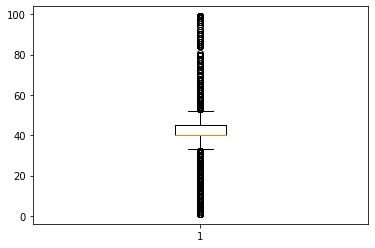

In [ ]:
plt.boxplot(train['Jam per Minggu'])

In [ ]:
e,f = pd.cut(train['Jam per Minggu'],3, labels=[1,2,3],retbins=True)
train['Jam per Minggu']=pd.cut(train['Jam per Minggu'],bins=f, labels=[1,2,3])
test['Jam per Minggu']=pd.cut(test['Jam per Minggu'],bins=f, labels=[1,2,3])

count    35994.000000
mean        38.664555
std         13.676266
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: Umur, dtype: float64


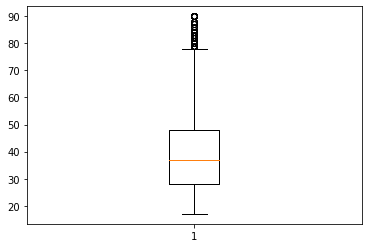

In [ ]:
plt.boxplot(train['Umur'])
print(train['Umur'].describe())

In [ ]:
g,h = pd.cut(train['Umur'],3, labels=[1,2,3],retbins=True)
train['Umur']=pd.cut(train['Umur'],bins=h, labels=[1,2,3])
test['Umur']=pd.cut(test['Umur'],bins=h, labels=[1,2,3])

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

In [ ]:
X_train = train.drop(["id","Gaji"], axis=1)
Y_train = train["Gaji"]
X_test  = test.drop("id", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((35994, 11), (35994,), (9599, 11))

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred_LS = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


83.13

In [ ]:
Y_train_pred_LS = logreg.predict(X_train)
roc_auc_score(Y_train,Y_train_pred_LS)

0.712937619827829

In [ ]:
random_forest = RandomForestClassifier(n_estimators=200)
random_forest.fit(X_train, Y_train)
Y_pred_RF = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

91.48

In [ ]:
Y_train_RF = random_forest.predict(X_train)
roc_auc_score(Y_train,Y_train_RF)

0.8688149699946628

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 24, weights='uniform')
knn.fit(X_train, Y_train)
Y_pred_KNN = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

83.53

In [ ]:
Y_train_KNN = random_forest.predict(X_train)
roc_auc_score(Y_train,Y_train_KNN)

0.8688149699946628

In [ ]:
test['Gaji'] = Y_pred_RF
test.head()

,id,Umur,Kelas Pekerja,Berat Akhir,Pendidikan,Jmlh Tahun Pendidikan,Status Perkawinan,Pekerjaan,Jenis Kelamin,Keuntungan Kapital,Kerugian Capital,Jam per Minggu,Gaji
0,35994,1,2,2,14,11,3,8,1,1,1,2,0
1,35995,1,1,7,1,9,5,11,2,1,1,2,0
2,35996,1,6,7,6,10,5,8,2,1,1,2,1
3,35997,2,1,10,6,10,5,2,2,1,3,2,1
4,35998,1,1,4,6,10,4,5,1,1,2,2,0


In [ ]:
train2 = pd.read_csv('train.csv')
test2 = pd.read_csv('test.csv')

In [ ]:
train['Kelas Pekerja'] = train2['Kelas Pekerja'].copy()
test['Kelas Pekerja'] = test2['Kelas Pekerja'].copy()
train['Pekerjaan'] = train2['Pekerjaan'].copy()
test['Pekerjaan'] = test2['Pekerjaan'].copy()

In [ ]:
gabungan = pd.concat([train,test],ignore_index=False)
#kemudian berikan kembali label pada kelas pekerja dan pekerjaannya
#yang kali ini tanda tanyanya dibiarkan aja
gabungan['Pekerjaan']=gabungan['Pekerjaan'].replace({'Servis Lainnya':1, 'Ekesekutif Managerial':2, 'Spesialis':3, 'Perbaikan Kerajinan':4,  'Sales':5, 'Pembersih':6, 'Pemuka Agama':7, 'Petani':8, 'Tech-support':9, 'Mesin Inspeksi':10, 'Supir':11, 'Asisten Rumah Tangga':12, 'Penjaga':13, 'Tentara':14})
gabungan['Kelas Pekerja']=gabungan['Kelas Pekerja'].replace({'Wiraswasta':1, 'Pemerintah Lokal':2, 'Pekerja Bebas Perusahaan':3,
       'Pemerintah Negara':4, 'Pekerja Bebas Bukan Perusahan':5,
       'Pemerintah Provinsi':6, 'Tidak Pernah Bekerja':7, 'Tanpa di Bayar':8})

In [ ]:
data1 = gabungan.loc[gabungan['Kelas Pekerja']!='?'].copy()
data2 = gabungan.loc[gabungan['Kelas Pekerja']=='?'].copy()

In [ ]:
data1['Pekerjaan'].value_counts()
#Ternyata ada nilai ? yang hadeh , karna ini data training dan cuma , gampangnya di mode aja :)
data1['Pekerjaan']= data1['Pekerjaan'].replace({'?':data1['Pekerjaan'].mode().values[0]})

In [ ]:
x_data1_train = data1.drop(['id','Kelas Pekerja','Pekerjaan'], axis=1).copy()
y_data1_train_KP = data1['Kelas Pekerja'].copy().astype('int64')
x_data2_test = data2.drop(['id','Kelas Pekerja','Pekerjaan'], axis=1).copy()

In [ ]:
#Kita coba prediksi pakai RFC
model_RFC = RandomForestClassifier(n_estimators=100)
model_RFC.fit(x_data1_train, y_data1_train_KP)
y_data1_test = model_RFC.predict(x_data2_test)
acc_model_RFC = round(model_RFC.score(x_data1_train, y_data1_train_KP) * 100, 2)
acc_model_RFC

78.0

In [ ]:
data2['Kelas Pekerja'] = y_data1_test
data2['Kelas Pekerja'].value_counts()

1    2359
5     162
2      46
3      23
4      21
6       4
Name: Kelas Pekerja, dtype: int64

In [ ]:
data1['Kelas Pekerja'] = data1['Kelas Pekerja'].astype('int64')

In [ ]:
x_data1_train_P = data1.drop(['id','Pekerjaan'], axis=1).copy()
y_data1_train_P = data1['Pekerjaan'].copy()
x_data2_test_P = data2.drop(['id','Pekerjaan'], axis=1).copy()

In [ ]:
#Prediksi Pekerjaan
model_RFC = RandomForestClassifier(n_estimators=100)
model_RFC.fit(x_data1_train_P, y_data1_train_P)
y_data2_test = model_RFC.predict(x_data2_test_P)
acc_model_RFC = round(model_RFC.score(x_data1_train_P, y_data1_train_P) * 100, 2)
acc_model_RFC

51.4

In [ ]:
data2['Pekerjaan'] = y_data2_test
data2['Pekerjaan'].value_counts()

1     624
7     476
4     459
5     344
3     186
2     124
10     97
6      89
8      78
11     69
9      32
12     22
13     15
Name: Pekerjaan, dtype: int64

In [ ]:
Data_lengkap= pd.concat([data1, data2],ignore_index=True)
Data_lengkap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   id                     45593 non-null  int64   
 1   Umur                   45593 non-null  category
 2   Kelas Pekerja          45593 non-null  int64   
 3   Berat Akhir            45593 non-null  category
 4   Pendidikan             45593 non-null  int64   
 5   Jmlh Tahun Pendidikan  45593 non-null  int64   
 6   Status Perkawinan      45593 non-null  int64   
 7   Pekerjaan              45593 non-null  int64   
 8   Jenis Kelamin          45593 non-null  int64   
 9   Keuntungan Kapital     45593 non-null  category
 10  Kerugian Capital       45593 non-null  category
 11  Jam per Minggu         45593 non-null  category
 12  Gaji                   45593 non-null  int64   
dtypes: category(5), int64(8)
memory usage: 3.0 MB


In [ ]:
Data_lengkap  =Data_lengkap.sort_values(by=['id']).set_index('id')

In [ ]:
Train_final = Data_lengkap.iloc[:35994]
Test_final = Data_lengkap.loc[35994:].drop('Gaji', axis=1)

In [ ]:
x_Train_final = Train_final.drop('Gaji',axis=1).copy()
y_Train_final = Train_final['Gaji'].copy()
x_Test_final = Test_final.copy()

In [ ]:
#Random Forest
RFC = RandomForestClassifier(n_estimators=250)
RFC.fit(x_Train_final, y_Train_final)
y_Test_final = RFC.predict(x_Test_final)
acc_RFC = round(RFC.score(x_Train_final, y_Train_final) * 100, 2)
acc_RFC

91.53

In [ ]:
y_Train_final_Coba= RFC.predict(x_Train_final)
roc_auc_score(y_Train_final,y_Train_final_Coba)

0.8692597441335496

In [ ]:
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV
import numpy as np
model = KNeighborsClassifier()
param_grid ={'n_neighbors':np.arange(5,25), 'weights':['uniform','distance']}
gscv = GridSearchCV(model, param_grid=param_grid, scoring='accuracy', cv=5)
gscv.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24]),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [ ]:
gscv.best_params_

{'n_neighbors': 24, 'weights': 'uniform'}

In [ ]:
#Model KNN
knn = KNeighborsClassifier()
param_grid ={'n_neighbors':np.arange(5,50), 'weights':['uniform']}
gscv = GridSearchCV(knn, param_grid=param_grid, scoring='accuracy', cv=5)
gscv.fit(x_Train_final, y_Train_final)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
       39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'weights': ['uniform']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [ ]:
gscv.best_params_

{'n_neighbors': 25, 'weights': 'uniform'}

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 25, weights='uniform')
knn.fit(x_Train_final, y_Train_final)
y_Test_final_knn = knn.predict(x_Test_final)
acc_knn = round(knn.score(x_Train_final, y_Train_final) * 100, 2)
acc_knn

83.68

In [ ]:
submission = pd.DataFrame({"id": test["id"],"Gaji": y_Test_final_knn}) 
submission.to_csv('firdaus.csv',index=False)

In [ ]:
pd.read_csv('firdaus.csv')

,id,Gaji
0,35994,0
1,35995,0
2,35996,0
3,35997,1
4,35998,0
...,...,...
9594,45588,0
9595,45589,0
9596,45590,0
9597,45591,0
